In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [2]:
# Import dependencies
import pandas as pd

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read the CSV and Perform Basic Data Cleaning

In [3]:
df = pd.read_csv("data/exoplanet_data.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [4]:
X = df.drop('koi_disposition',axis=1)
y = df['koi_disposition']
print(X.shape, y.shape)

(6991, 40) (6991,)


[0.13149639 0.1652036  0.13162977 0.04896641 0.01892191 0.01440106
 0.01508021 0.01275215 0.0215479  0.02457061 0.0127516  0.01177646
 0.00989245 0.01703564 0.02680347 0.02429421 0.02152257 0.01210903
 0.01279419 0.01336708 0.01169622 0.01028815 0.01382169 0.00960048
 0.00966937 0.00835    0.0335426  0.00977985 0.01075355 0.0215984
 0.01796211 0.01076815 0.0100134  0.01357837 0.00859944 0.01187101
 0.00881351 0.0115218  0.0103513  0.0105039 ]


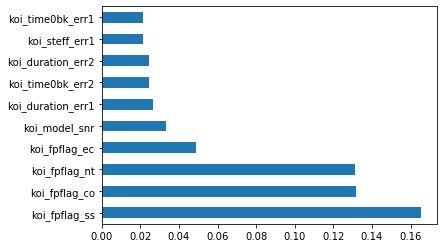

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [6]:
# Set features on the basis of importance
X = df[feat_importances.index]
y = df['koi_disposition']
#print(X)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [8]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
238,0,0,0,0,9.467821,0.000006,-0.000006,178.415842,0.000517,-0.000517,...,-89,4.807,0.050,-0.045,0.458,0.040,-0.055,283.73203,45.958771,15.073
3338,0,0,0,0,2.418102,0.000014,-0.000014,132.388940,0.004600,-0.004600,...,-124,4.307,0.080,-0.120,1.239,0.219,-0.135,283.43576,47.066860,12.278
2583,0,0,0,0,16.080657,0.000008,-0.000008,182.760100,0.000393,-0.000393,...,-106,4.547,0.030,-0.070,0.817,0.069,-0.044,293.59189,41.095161,13.653
4716,1,0,0,0,77.395279,0.002809,-0.002809,165.805000,0.026200,-0.026200,...,-138,3.541,0.193,-0.328,2.995,1.593,-0.704,289.25467,45.055210,13.774
1853,0,0,0,0,12.582298,0.000027,-0.000027,175.021290,0.001660,-0.001660,...,-58,4.091,0.011,-0.011,1.423,0.047,-0.026,293.73282,41.900829,11.411


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

# Create scaler object
X_scaler = MinMaxScaler().fit(X_train)

# Scale training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [10]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train_scaled, y_train)

LogisticRegression()

In [11]:

print(f"Training Data Score: {model1.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model1.score(X_test_scaled, y_test)}")


Training Data Score: 0.854854091169178
Testing Data Score: 0.8483981693363845


# Predict

In [12]:
predictions = model1.predict(X_test_scaled)
df_pred = pd.DataFrame({"Actual":y_test,"Predicted":predictions})
df_pred.head()

,Actual,Predicted
6388,FALSE POSITIVE,FALSE POSITIVE
5599,FALSE POSITIVE,FALSE POSITIVE
5838,FALSE POSITIVE,FALSE POSITIVE
486,FALSE POSITIVE,FALSE POSITIVE
6098,FALSE POSITIVE,FALSE POSITIVE


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [13]:
from sklearn.model_selection import GridSearchCV

# Create the GridSearchCV model
param_grid = {'C':[1, 5, 10],
             'penalty':['l1','l2']}

grid = GridSearchCV(model1, param_grid, verbose=3)

In [14]:
# Train the model with GridSearch
best_model = grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l2 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=1, penalty=l2, score=0.852, total=   0.2s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.844, total=   0.2s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.834, total=   0.2s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.851, total=   0.2s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.855, total=   0.2s
[CV] C=5, penalty=l1 .................................................
[CV] ....................... C=5, penalty=l1, score=nan, total=   0.0s
[CV] C=5, penalty=l1 .................................................
[CV] ....................... C=5, penalty=l1, score=nan, total=   0.0s
[CV] C=5, penalty=l1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.1s finished


In [15]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'penalty': 'l2'}
0.8699233730415734


# Save the Model

In [1]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'logisticRegression.sav'
joblib.dump(grid, filename)

NameError: name 'grid' is not defined